In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from itertools import product
from competition.titanic.FeaturesEngineering import *
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("error", category=FutureWarning)

from sklearn.pipeline import Pipeline

(891, 11)
(891,)


In [2]:
df = pd.read_csv("../data/train.csv", delimiter=",")

features = [x for x in df.columns if x != "Survived"]
x, y = df[features], df["Survived"].T
print(x.shape)
print(y.shape)

(891, 11)
(891,)


In [3]:
X_train, X_cv, y_train, y_cv = train_test_split(x, y, train_size=0.8, random_state=1)

colsample_bytree: 0.1, train_accuracy 0.8342696629213483, cv_accuracy: 0.776536312849162
colsample_bytree: 0.2, train_accuracy 0.8539325842696629, cv_accuracy: 0.8044692737430168
colsample_bytree: 0.3, train_accuracy 0.8651685393258427, cv_accuracy: 0.7988826815642458
colsample_bytree: 0.4, train_accuracy 0.8679775280898876, cv_accuracy: 0.7988826815642458
colsample_bytree: 0.5, train_accuracy 0.8735955056179775, cv_accuracy: 0.7877094972067039
colsample_bytree: 0.6, train_accuracy 0.8735955056179775, cv_accuracy: 0.7932960893854749
colsample_bytree: 0.7, train_accuracy 0.8721910112359551, cv_accuracy: 0.776536312849162


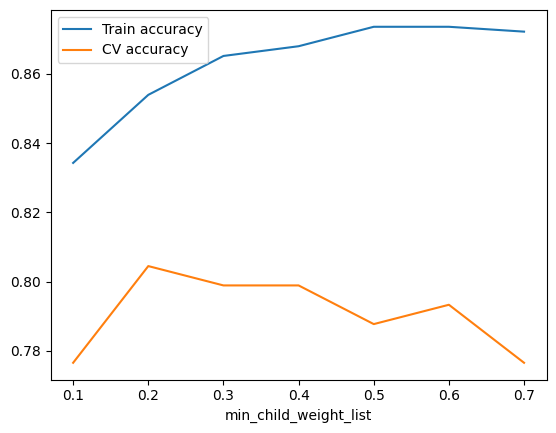

In [21]:
# Max depth: 3, n_estimators: 140, min_child_weight: 10, colsample_bytree: 0.4,reg_lambda: 0.1,reg_alpha: 0.5, train_accuracy: 0.8764044943820225, cv_accuracy: 0.8044692737430168

colsample_bytree_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
train_acc = []
cv_acc = []
for colsample_bytree in colsample_bytree_list:
    model = Pipeline(steps=[
        ("preprocessor", engineer_features()),
        ("classifier", XGBClassifier(n_estimators=140,
                                     learning_rate=0.1,
                                     max_depth=3,
                                     min_child_weight=10,
                                     colsample_bytree=0.2,
                                     reg_lambda=0.1,
                                     reg_alpha=0.5,
                                     random_state=1))
    ])
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    train_accuracy = np.mean(y_train == y_train_hat)
    y_cv_hat = model.predict(X_cv)
    cv_accuracy = np.mean(y_cv == y_cv_hat)
    train_acc.append(train_accuracy)
    cv_acc.append(cv_accuracy)
    print(f"colsample_bytree: {colsample_bytree}, train_accuracy {train_accuracy}, cv_accuracy: {cv_accuracy}")

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(colsample_bytree_list, train_acc)
plt.plot(colsample_bytree_list, cv_acc)
plt.xlabel("min_child_weight_list")
plt.legend(["Train accuracy", "CV accuracy"])
plt.show()



In [24]:
max_depth_list = [4, 5]
n_estimators_list = [130, 140, 150, 160]
colsample_bytree_list = [0.2, 0.3, 0.4]
reg_lambda_list = [0, 0.1, 0.5, 1]
reg_alpha_list = [0.3, 0.5, 0.7]


def eval_models(X_train, y_train, X_cv, y_cv,
                max_depth,
                n_estimators,
                colsample_bytree,
                reg_alpha,
                reg_lambda,
                feature_transformer):
    model = Pipeline(steps=[
        ("preprocessor", feature_transformer),
        ("classifier", XGBClassifier(n_estimators=n_estimators,
                                     learning_rate=0.1,
                                     max_depth=max_depth,
                                     min_child_weight=10,
                                     colsample_bytree=colsample_bytree,
                                     reg_lambda=reg_lambda,
                                     reg_alpha=reg_alpha,
                                     random_state=1))
    ])
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    train_accuracy = np.mean(y_train == y_train_hat)
    y_cv_hat = model.predict(X_cv)
    cv_accuracy = np.mean(y_cv == y_cv_hat)
    print(
        f"Max depth: {max_depth}, n_estimators: {n_estimators}, colsample_bytree: {colsample_bytree},reg_lambda: {reg_lambda},reg_alpha: {reg_alpha}, train_accuracy: {train_accuracy}, cv_accuracy: {cv_accuracy}")
    return model, train_accuracy, cv_accuracy, max_depth, n_estimators, colsample_bytree, reg_alpha, reg_lambda,


# for max_depth, min_child_weight, n_estimators, colsample_bytree in product(max_depth_list, min_child_weight_list, n_estimators_list, colsample_bytree_list):
#     eval_models(X_train, y_train, X_cv, y_cv, max_depth, min_child_weight, n_estimators, colsample_bytree, engineer_features())
model_evals = [
    eval_models(X_train, y_train, X_cv, y_cv, max_depth, n_estimators, colsample_bytree, reg_lambda,
                reg_alpha, engineer_features()) for
    max_depth, n_estimators, colsample_bytree, reg_lambda, reg_alpha in
    product(max_depth_list, n_estimators_list, colsample_bytree_list, reg_lambda_list, reg_alpha_list)]
best_model_params = max(model_evals, key=lambda x: x[2])
print(best_model_params[-7:])

Max depth: 4, n_estimators: 130, colsample_bytree: 0.2,reg_lambda: 0.3,reg_alpha: 0, train_accuracy: 0.8679775280898876, cv_accuracy: 0.7821229050279329
Max depth: 4, n_estimators: 130, colsample_bytree: 0.2,reg_lambda: 0.5,reg_alpha: 0, train_accuracy: 0.8623595505617978, cv_accuracy: 0.7877094972067039
Max depth: 4, n_estimators: 130, colsample_bytree: 0.2,reg_lambda: 0.7,reg_alpha: 0, train_accuracy: 0.8637640449438202, cv_accuracy: 0.7877094972067039
Max depth: 4, n_estimators: 130, colsample_bytree: 0.2,reg_lambda: 0.3,reg_alpha: 0.1, train_accuracy: 0.8637640449438202, cv_accuracy: 0.7877094972067039
Max depth: 4, n_estimators: 130, colsample_bytree: 0.2,reg_lambda: 0.5,reg_alpha: 0.1, train_accuracy: 0.8623595505617978, cv_accuracy: 0.776536312849162
Max depth: 4, n_estimators: 130, colsample_bytree: 0.2,reg_lambda: 0.7,reg_alpha: 0.1, train_accuracy: 0.8609550561797753, cv_accuracy: 0.7877094972067039
Max depth: 4, n_estimators: 130, colsample_bytree: 0.2,reg_lambda: 0.3,reg_al

In [22]:
# (np.float64(0.8212290502793296), 4, 9, 130, 0.3, 0, 0.3)
selected_model = Pipeline(steps=[
    ("preprocessor", engineer_features()),
    ("classifier", XGBClassifier(n_estimators=140,
                                 learning_rate=0.1,
                                 max_depth=3,
                                 min_child_weight=10,
                                 colsample_bytree=0.2,
                                 reg_lambda=0.1,
                                 reg_alpha=0.5,
                                 random_state=1))
])
selected_model.fit(X_train, y_train)
y_train_hat = selected_model.predict(X_train)
train_accuracy = np.mean(y_train == y_train_hat)
y_cv_hat = selected_model.predict(X_cv)
cv_accuracy = np.mean(y_cv == y_cv_hat)
df_test = pd.read_csv("../data/test.csv", delimiter=",")
y_test_hat = selected_model.predict(df_test)
output = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": y_test_hat
})
output.to_csv("xgb_submission.csv", index=False)

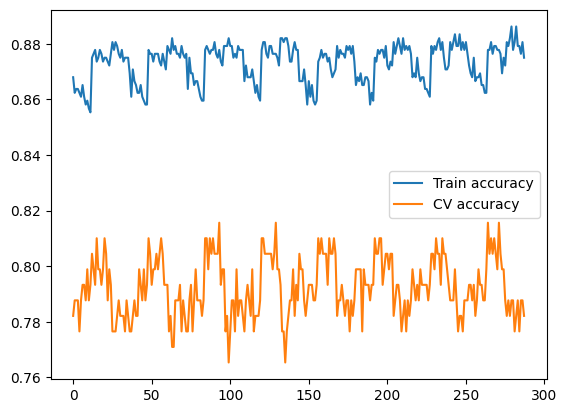

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
train_accuracy = [model[1] for model in model_evals]
cv_accuracy = [model[2] for model in model_evals]
plt.plot(range(len(model_evals)), train_accuracy)
plt.plot(range(len(model_evals)), cv_accuracy)
plt.legend(["Train accuracy", "CV accuracy"])
plt.show()

In [6]:
df_test = pd.read_csv("../data/test.csv", delimiter=",")

best_model = best_model_params[0]
y_test_hat = best_model.predict(df_test)
output = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": y_test_hat
})
output.to_csv("xgb_submission.csv", index=False)